# **Representação de espaços de estados**

A representação de estados é um tipo de *modelagem de sistema* **no domínio do tempo** que usamos para análise e projeto em Engenharia de Controle Automático.

A principal característica desse tipo de modelagem é que o sistema fica descrito por um **conjunto de equações diferenciais de 1a ordem**, ao invés de uma única equação diferencial de ordem elevada.

Para sistemas LIT (*Lineares Invariantes no Tempo*), o conjunto de equações é linear e podemos usar **matrizes** para auxiliar na representação do sistema. Isso traz uma série de comodidades para trabalhar, porém requer que lembrar de alguns conceitos da Álgebra Linear.


## Notação de derivadas:
$$
\begin{align}
    \frac{dx(t)}{dt} &= \dot{x}(t) \text{ ou simplesmente } \dot{x}\\
    \frac{d^2x(t)}{dt^2} &= \ddot{x}(t) \text{ ou simplesmente } \ddot{x}
\end{align}
$$

## Exemplo ilustrativo

$$
\begin{align}
  \frac{Y(s)}{U(s)} = \frac{10s+7}{s^2+4s+22}
    \Leftrightarrow  \left\{\begin{array}{l}
  \dot{x}_1 = -4x_1-22x_2+u\\
  \dot{x}_2 = x_1\\
  y = 10x_1+ 7x_2 \end{array}\right.
\end{align}
$$

O conjunto de equações à direita pode ser escrito também:
$$
\begin{align}
  \dot{\mathbf{x}} &= \left[\begin{array}{rr}-4 & -22\\ 1 & 0 \end{array}\right]\mathbf{x}+
  \left[\begin{array}{r}1\\ 0 \end{array}\right]u\\
  y &= \left[\begin{array}{rr}10 & 7\end{array}\right]\mathbf{x}
\end{align}
$$

$\mathbf{x}$ é um vetor coluna contendo os sinais $x_1(t)$ e $x_2(t)$, isto é $\mathbf{x}=\left[\begin{array}{cc}
x_1 & x_2\end{array}\right]^T$. Na maioria das vezes omitimos a dependência de $t$.

Neste caso o sistema é representado pelas matrizes:
$$
\begin{align}
  \mathbf{A} &= \left[\begin{array}{rr}-4 & -22\\ 1 & 0 \end{array}\right]\\
  \mathbf{B} &= \left[\begin{array}{r}1\\ 0 \end{array}\right]\\
  \mathbf{C} &= \left[\begin{array}{rr}10 & 7\end{array}\right]
\end{align}

Você ainda não precisa entender como "converter" a função de transferência nas matrizes. Apenas tenha em mente que, embora as representações sejam muito diferentes elas representam o **mesmo** sistema

# **Exemplo ilustrativo**

Podemos conferir que os sistemas representam a mesma coisa simulando uma resposta ao degrau.

In [13]:
import numpy as np
import control as ct
from matplotlib import pyplot as plt

G1 = ct.tf([10,7],[1,4,22])
print(G1)
A = np.array([[-4,-22],[1,0]])
B = np.array([[1],[0]])
C = np.array([[10,7]])
G2 = ct.ss(A,B,C,0)
print(G2)


   10 s + 7
--------------
s^2 + 4 s + 22

<LinearIOSystem>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ -4. -22.]
     [  1.   0.]]

B = [[1.]
     [0.]]

C = [[10.  7.]]

D = [[0.]]



In [2]:
# Simulação da resposta
y1 = ct.step_response(G1)
y2 = ct.step_response(G2)

Text(0.5, 0, 'Tempo (seg)')

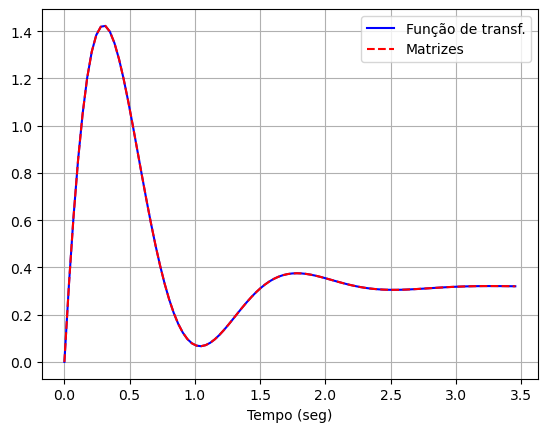

In [15]:
plt.plot(y1.time,y1.outputs,'b-',y2.time,y2.outputs,'r--')
plt.legend(['Função de transf.', 'Matrizes'])
plt.grid()
plt.xlabel('Tempo (seg)')